In [1]:
import os, os.path as osp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
DATA_DIR = '/home/chandan/Documents/datasets/talkingdata-adtracking-fraud-detection'

In [3]:
train = pd.read_csv(osp.join(DATA_DIR, 'train_sample.csv'))
test = pd.read_csv(osp.join(DATA_DIR, 'test.csv'))

In [4]:
train.head()

,ip,app,device,os,channel,click_time,attributed_time,is_attributed
0,87540,12,1,13,497,2017-11-07 09:30:38,NaN,0
1,105560,25,1,17,259,2017-11-07 13:40:27,NaN,0
2,101424,12,1,19,212,2017-11-07 18:05:24,NaN,0
3,94584,13,1,13,477,2017-11-07 04:58:08,NaN,0
4,68413,12,1,1,178,2017-11-09 09:00:09,NaN,0


In [5]:
test.head()

,click_id,ip,app,device,os,channel,click_time
0,0,5744,9,1,3,107,2017-11-10 04:00:00
1,1,119901,9,1,3,466,2017-11-10 04:00:00
2,2,72287,21,1,19,128,2017-11-10 04:00:00
3,3,78477,15,1,13,111,2017-11-10 04:00:00
4,4,123080,12,1,13,328,2017-11-10 04:00:00


In [6]:
# attributes
train.columns

Index([u'ip', u'app', u'device', u'os', u'channel', u'click_time',
       u'attributed_time', u'is_attributed'],
      dtype='object')

## Train

- ip: ip address of click.
   - encoding: int
   - IP address dont have a >, < ordering
   - closer IP addresses may be geographically closer
   - transform: bin it and make it categorical?
- app: app id for marketing.
    - encoding: 
- device: device type id of user mobile phone (e.g., iphone 6 plus, iphone 7, huawei mate 7, etc.)
    - encoding: 
- os: os version id of user mobile phone
    - encoding: 
- channel: channel id of mobile ad publisher
- click_time: timestamp of click (UTC)
- attributed_time: if user download the app for after clicking an ad, this is the time of the app download
- is_attributed: the target that is to be predicted, indicating the app was downloaded

Note that ip, app, device, os, and channel are encoded.

## Test

- click_id: reference for making predictions
- is_attributed: not included

In [30]:
def get_XY(df):
    '''
    df: dataframe read from CSV
    
    return:
    X: dataframe of features that can be given to model.fit
    Y: dataframe of targets
    '''
    X = df.drop('is_attributed', axis=1) # drop doesnt work inplace
    # remove this column
    X.drop('attributed_time', axis=1, inplace=True)
    
    X.ip = list(encode_ip(X.ip))
    X.os = list(encode_os(X.os))
    X.click_time = list(encode_click_time(X.click_time))
    
    Y = df.is_attributed
    
    return X, Y

In [10]:
# ip address - divide into 1000 bins
from sklearn.preprocessing import OneHotEncoder

def encode_ip(ip):
    num_ip_bins = 1024
    binned_ips = (ip / num_ip_bins).astype(int) 
    enc = OneHotEncoder()
    
    return enc.fit_transform(binned_ips.values.reshape((-1, 1)))

In [38]:
# convert click time to time or day, weekend indicator, day of week
from datetime import datetime

def encode_click_time(ct):
    converted = pd.to_datetime(ct, infer_datetime_format=True)
    dayofweek = converted.dt.dayofweek 
    return dayofweek

In [ ]:
# remove attributed time

In [ ]:
# hash the device ID - has too many unique values

(0, 866)


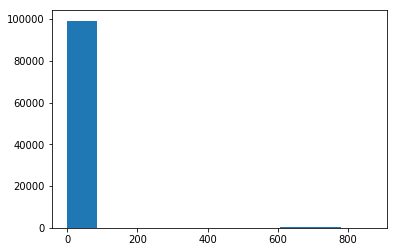

In [21]:
# OS
print(train.os.min(), train.os.max())
plt.hist(train.os, bins=10)

from sklearn.preprocessing import OneHotEncoder

def encode_os(os):
    # make categorical
    # 0-200, 600-800
    os[(os > 600) & (os < 800)] -= 400
    
    # now everything is in 0-400
    # one hot encode
    num_os_bins = 20
    binned_os = (os / num_os_bins).astype(int) 
    enc = OneHotEncoder()
    
    onehot = enc.fit_transform(binned_os.values.reshape((-1, 1)))
    
    return enc.fit_transform(binned_os.values.reshape((-1, 1)))
    

In [ ]:
# SGD classifier with partial fit

In [39]:
from sklearn.model_selection import train_test_split

X, Y = get_XY(train)
trainX, testX, trainY, testY = train_test_split(X, Y)

/home/chandan/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


In [32]:
trainX.head()

,ip,app,device,os,channel,click_time
47619,"(0, 16)\t1.0",3,1,"(0, 2)\t1.0",137,2
47476,"(0, 29)\t1.0",9,1,"(0, 0)\t1.0",232,3
88677,"(0, 112)\t1.0",9,2,"(0, 0)\t1.0",134,3
43839,"(0, 89)\t1.0",2,1,"(0, 0)\t1.0",435,2
60765,"(0, 152)\t1.0",3,1,"(0, 1)\t1.0",480,1


In [33]:
trainY.head()

47619    0
47476    0
88677    0
43839    0
60765    0
Name: is_attributed, dtype: int64

In [34]:
trainX.size

450000

In [40]:
# logistic regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(trainX, trainY)
model.evaluate(testX, testY)

ValueError: setting an array element with a sequence.